<a href="https://colab.research.google.com/github/imabari/covid19-data/blob/master/aichi/aichi_ocr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
!add-apt-repository ppa:alex-p/tesseract-ocr -y

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:6 http://ppa.launchpad.net/alex-p/tesseract-ocr/ubuntu bionic InRelease
Hit:7 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:11 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:14 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease
Reading package lists... Done


In [32]:
!apt update

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:6 http://ppa.launchpad.net/alex-p/tesseract-ocr/ubuntu bionic InRelease
Hit:7 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:11 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:14 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease
Reading package lists... Done
Building dependency tree 

In [33]:
!apt install tesseract-ocr
!apt install libtesseract-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2ppa1~bionic1).
0 upgraded, 0 newly installed, 0 to remove and 51 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libtesseract-dev is already the newest version (4.1.1-2ppa1~bionic1).
0 upgraded, 0 newly installed, 0 to remove and 51 not upgraded.


In [34]:
!tesseract -v

tesseract 4.1.1-rc2-21-gf4ef
 leptonica-1.78.0
  libgif 5.1.4 : libjpeg 8d (libjpeg-turbo 1.5.2) : libpng 1.6.34 : libtiff 4.0.9 : zlib 1.2.11 : libwebp 0.6.1 : libopenjp2 2.3.0
 Found AVX2
 Found AVX
 Found FMA
 Found SSE
 Found libarchive 3.2.2 zlib/1.2.11 liblzma/5.2.2 bz2lib/1.0.6 liblz4/1.7.1


In [35]:
!apt install tesseract-ocr-jpn  tesseract-ocr-jpn-vert
!apt install tesseract-ocr-script-jpan tesseract-ocr-script-jpan-vert

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr-jpn is already the newest version (1:4.0.0+git39-6572757-1ppa1~bionic1).
tesseract-ocr-jpn-vert is already the newest version (1:4.0.0+git39-6572757-1ppa1~bionic1).
0 upgraded, 0 newly installed, 0 to remove and 51 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr-script-jpan is already the newest version (1:4.0.0+git39-6572757-1ppa1~bionic1).
tesseract-ocr-script-jpan-vert is already the newest version (1:4.0.0+git39-6572757-1ppa1~bionic1).
0 upgraded, 0 newly installed, 0 to remove and 51 not upgraded.


In [36]:
!tesseract --list-langs

List of available languages (6):
Japanese
Japanese_vert
eng
jpn
jpn_vert
osd


# スクレイピング

In [0]:
import pathlib
import re

In [0]:
import requests
from bs4 import BeautifulSoup
from urllib.parse import urljoin

In [0]:
url = "https://www.pref.aichi.jp/site/covid19-aichi/"

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; WOW64; Trident/7.0; rv:11.0) like Gecko",
}

In [0]:
r = requests.get(url, headers=headers)

r.raise_for_status()

soup = BeautifulSoup(r.content, "html5lib")

In [0]:
src = soup.find("img", alt="検査陽性者").get("src")

In [42]:
link = urljoin(url, src)
link

'https://www.pref.aichi.jp/uploaded/image/240297.jpg'

# ダウンロード

In [0]:
def get_file(url, dir="."):

    r = requests.get(url)

    p = pathlib.Path(dir, pathlib.PurePath(url).name)
    p.parent.mkdir(parents=True, exist_ok=True)

    with p.open(mode='wb') as fw:
        fw.write(r.content)

    return p

In [0]:
jpg_path = get_file(link)

# pytesseract

In [45]:
!pip install pytesseract

In [0]:
try:
    from PIL import Image
except ImportError:
    import Image
    
import pytesseract

In [0]:
import cv2
import numpy as np

In [0]:
from google.colab.patches import cv2_imshow

In [0]:
# img = cv2.imread(str(jpg_path))
# img, _ = cv2.decolor(img)

In [0]:
src = cv2.imread(str(jpg_path))

img = cv2.inRange(src, (150, 150, 100), (255, 255, 255))

In [0]:
# img = cv2.imread(str(jpg_path), 0)

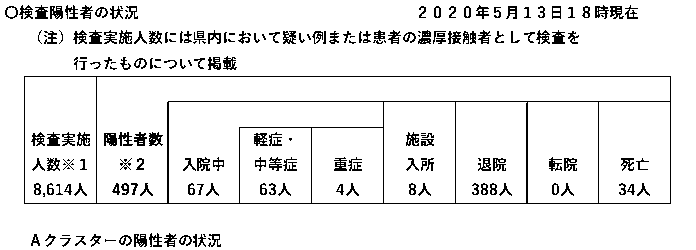

In [52]:
# 範囲指定
img_crop = img[0:250]

# 確認
cv2_imshow(img_crop)

In [0]:
txt = pytesseract.image_to_string(img_crop, lang="jpn", config="--psm 6").replace(".", "")

In [54]:
print(txt)

〇挨査陽性者の状況                       2020年5月13日18時現在
(注) 検査実施人数には県内において疑い例または悪者の漠厚接触者として検査を
行ったものについて掲載
挨査実施| 陽性者数         軽症・           施設
人数※1| ※2      入院中 | 中等症     重症      入所      退院      転院      死亡
8614人 | 497人 | 67人 | 63A人 | 4人       8人 | 388A人 | 0人 | 34人
AAクラスターの陽性者の状況


In [0]:
data = [int(i) for i in re.findall("[0-9]+", txt)]

In [0]:
result = []

while(len(data) >= 9):

    if data[2] == data[3] + data[4]:
        if data[1] == data[2] + data[5] + data[6] + data[7] + data[8]:
            result = data[:9]
            break

    data.pop(0)

# CSV

In [0]:
import datetime

In [0]:
import csv

In [0]:
dt_match = re.search("(\d{4})年(\d{1,2})月(\d{1,2})日(\d{1,2})時", txt)

In [60]:
if result:

    if dt_match:
        y, m, d, h = map(int, dt_match.groups())
        dt_update = datetime.datetime(y, m, d, h).strftime("%Y%m%d%H00")
    else:
        dt_update = datetime.datetime.now().strftime("%Y%m%d%H00")

    p = pathlib.Path(f'{dt_update}.csv')

    with p.open(mode='w') as fw:
        writer = csv.writer(fw)
        writer.writerow([dt_update] + result)

    print(result)

    jpg_path.rename(f"{dt_update}.jpg")

else:
    print("見つかりません")   

[8614, 497, 67, 63, 4, 8, 388, 0, 34]
